In [1]:
import numpy as np
from sklearn import svm
import matplotlib as mpl
import matplotlib.colors
import matplotlib.pyplot as plt

In [2]:
def extend(a, b, r=0.02):
    return a * (1 + r) - b * r, -a * r + b * (1 + r)

In [3]:
# 构造数据
t = np.linspace(-5, 5, 6)
t1, t2 = np.meshgrid(t, t)
x1 = np.stack((t1.ravel(), t2.ravel()), axis=1)
N = len(x1)
x2 = x1 + (1, 1)
x = np.concatenate((x1, x2))
y = np.array([1]*N + [-1]*N)

In [4]:
# 模型训练
clf = svm.SVC(C=0.1, kernel='rbf', gamma=5)
clf.fit(x, y)
y_hat = clf.predict(x)
print('准确率：%.1f%%' % (np.mean(y_hat == y) * 100))

准确率：100.0%


/Users/zhao/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  # Remove the CWD from sys.path while we load stuff.
/Users/zhao/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  from ipykernel import kernelapp as app


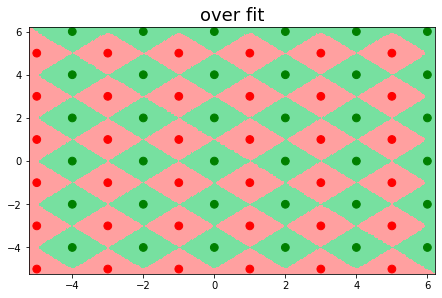

In [ ]:
cm_light = mpl.colors.ListedColormap(['#77E0A0', '#FFA0A0'])
cm_dark = mpl.colors.ListedColormap(['g', 'r'])
x1_min, x1_max = extend(x[:, 0].min(), x[:, 0].max())  # 第0列的范围
x2_min, x2_max = extend(x[:, 1].min(), x[:, 1].max())  # 第1列的范围
x1, x2 = np.mgrid[x1_min:x1_max:300j, x2_min:x2_max:300j]  # 生成网格采样点
grid_test = np.stack((x1.flat, x2.flat), axis=1)  # 测试点
grid_hat = clf.predict(grid_test)
grid_hat.shape = x1.shape  # 使之与输入的形状相同
plt.figure(facecolor='w')
plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)
plt.scatter(x[:, 0], x[:, 1], s=60, c=y, marker='o', cmap=cm_dark)
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.title('over fit', fontsize=18)
plt.tight_layout(0.2)
plt.show()